In [2]:
#!pip install mapclassify

In [3]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt 

import mapclassify.classifiers as classifiers

# For legend
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Census Block Demographics Map

### Load the census block demographic data

In [4]:
census_blocks_demo = pd.read_csv('../data/census-blocks/census-blocks-demographics.csv')

In [5]:
census_blocks_demo.head()

,censusid,blockid,blockgroupname,total_population_edu,high_school_diploma,ged_credential,bachelors_degree,masters_degree,professional_degree,doctorate_degree,...,above_poverty_family_other_male_no_spouse_rate,above_poverty_family_other_female_no_spouse_rate,above_poverty_nonfamily_rate,above_poverty_nonfamily_male_rate,above_poverty_nonfamily_female_rate,total_population_assist,with_assistance,without_assistance,with_assistance_rate,without_assistance_rate
0,1500000US720019563001,720019563001,"Block Group 1, Census Tract 9563, Adjuntas Mun...",1163,302,21,228,0,17,0,...,0.000000,0.074875,0.128120,0.078203,0.049917,601,311,290,0.517471,0.482529
1,1500000US720019563002,720019563002,"Block Group 2, Census Tract 9563, Adjuntas Mun...",1582,367,27,343,32,0,0,...,0.021067,0.063202,0.066011,0.043539,0.022472,712,377,335,0.529494,0.470506
2,1500000US720019564001,720019564001,"Block Group 1, Census Tract 9564, Adjuntas Mun...",1167,281,20,145,14,0,0,...,0.000000,0.015267,0.085878,0.051527,0.034351,524,236,288,0.450382,0.549618
3,1500000US720019564002,720019564002,"Block Group 2, Census Tract 9564, Adjuntas Mun...",725,141,0,161,29,0,0,...,0.000000,0.000000,0.147139,0.043597,0.103542,367,199,168,0.542234,0.457766
4,1500000US720019565001,720019565001,"Block Group 1, Census Tract 9565, Adjuntas Mun...",1153,272,7,130,10,0,0,...,0.055785,0.074380,0.000000,0.000000,0.000000,484,275,209,0.568182,0.431818


In [6]:
census_blocks_demo.columns

Index(['censusid', 'blockid', 'blockgroupname', 'total_population_edu',
       'high_school_diploma', 'ged_credential', 'bachelors_degree',
       'masters_degree', 'professional_degree', 'doctorate_degree',
       'high_school_diploma_rate', 'ged_credential_rate',
       'bachelors_degree_rate', 'masters_degree_rate',
       'professional_degree_rate', 'doctorate_degree_rate',
       'total_population_employ', 'labor_force_total', 'civilian_labor_force',
       'employed_labor_force', 'unemployed_labor_force',
       'armed_forces_labor_force', 'not_labor_force_total', 'labor_force_rate',
       'civilian_labor_rate', 'employed_labor_rate', 'unemployed_labor_rate',
       'armed_forces_labor_rate', 'not_labor_force_rate',
       'total_population_income', 'income_less_10k', 'income_10k_15k',
       'income_15k_20k', 'income_20k_25k', 'income_25k_30k', 'income_30k_35k',
       'income_35k_40k', 'income_40k_45k', 'income_45k_50k', 'income_50k_60k',
       'income_60k_75k', 'income_75k_1

In [7]:
# add column for rate of high school or higher degree
census_blocks_demo['hs_diploma_or_higher_rate'] = census_blocks_demo['ged_credential_rate'] + census_blocks_demo['high_school_diploma_rate'] + census_blocks_demo['bachelors_degree_rate'] + census_blocks_demo['masters_degree_rate'] + census_blocks_demo['professional_degree_rate'] + census_blocks_demo['doctorate_degree_rate']
census_blocks_demo['hs_diploma_or_higher_rate'].head()

0    0.488392
1    0.486094
2    0.394173
3    0.456552
4    0.363400
Name: hs_diploma_or_higher_rate, dtype: float64

### Load the census block shapefiles for Puerto Rico
https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

In [8]:
census_blocks_shp = gpd.read_file('../data/census-blocks/shapefiles/cb_2019_72_bg_500k.shp')

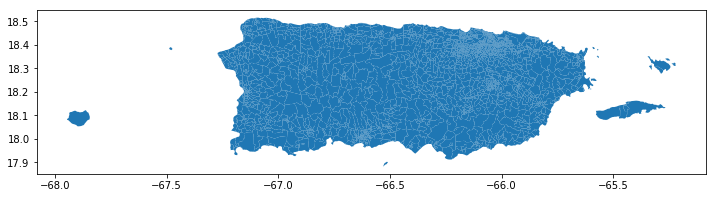

In [9]:
census_blocks_shp.plot(figsize=(12,12))

In [10]:
census_blocks_shp.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,72,081,958100,2,1500000US720819581002,720819581002,2,BG,945455,0,"POLYGON ((-66.88980 18.29002, -66.88597 18.290..."
1,72,097,080300,3,1500000US720970803003,720970803003,3,BG,85353,252718,"POLYGON ((-67.15896 18.21245, -67.15896 18.214..."
2,72,153,750400,2,1500000US721537504002,721537504002,2,BG,334281,0,"POLYGON ((-66.85738 18.03826, -66.85563 18.040..."
3,72,077,500200,4,1500000US720775002004,720775002004,4,BG,293804,0,"POLYGON ((-65.92505 18.22867, -65.92447 18.232..."
4,72,119,130200,2,1500000US721191302002,721191302002,2,BG,176202,0,"POLYGON ((-65.83301 18.38225, -65.83250 18.383..."


### Create the county outline for the map

In [11]:
# dissolve by the second column which is the county boundary, dissolve by first column is the state boundary
county_outline = census_blocks_shp.dissolve(by=census_blocks_shp.columns[1], aggfunc='first')

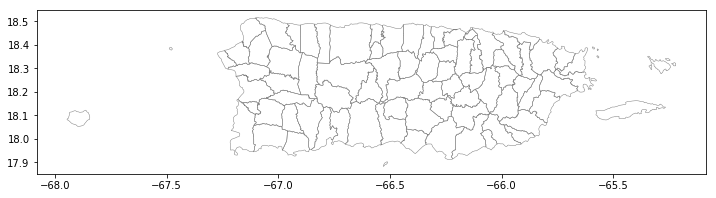

In [12]:
county_outline.plot(figsize=(12,12), facecolor='none', edgecolor='grey', linewidth=.5)

### Looks like there are 37 additional census blocks in the census_blocks_demographics. Need to investigate

In [13]:
df_all = census_blocks_demo.merge(census_blocks_shp.drop_duplicates(), left_on='censusid', right_on='AFFGEOID',                    how='left', indicator=True)
df_all['_merge'].value_counts()

both          2557
left_only       37
right_only       0
Name: _merge, dtype: int64

### Merge the demo and shapefile dataframes

In [14]:
# Merge the 2 dataframes by census_blocks_shp.AFFGEOID and census_blocks_demo.censusid
# Left join so that we only keep the blocks corresponding to the shapefile blocks
census_blocks_demo_map = census_blocks_shp.merge(
    census_blocks_demo.loc[:, ['censusid', 'below_poverty_rate', 'with_assistance_rate', 'hs_diploma_or_higher_rate']], 
    how='left', left_on='AFFGEOID', right_on='censusid', validate='one_to_one')

In [15]:
census_blocks_demo_map.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,censusid,below_poverty_rate,with_assistance_rate,hs_diploma_or_higher_rate
0,72,081,958100,2,1500000US720819581002,720819581002,2,BG,945455,0,"POLYGON ((-66.88980 18.29002, -66.88597 18.290...",1500000US720819581002,0.527687,0.452769,0.585462
1,72,097,080300,3,1500000US720970803003,720970803003,3,BG,85353,252718,"POLYGON ((-67.15896 18.21245, -67.15896 18.214...",1500000US720970803003,0.295337,0.502591,0.489676
2,72,153,750400,2,1500000US721537504002,721537504002,2,BG,334281,0,"POLYGON ((-66.85738 18.03826, -66.85563 18.040...",1500000US721537504002,0.687075,0.557823,0.488656
3,72,077,500200,4,1500000US720775002004,720775002004,4,BG,293804,0,"POLYGON ((-65.92505 18.22867, -65.92447 18.232...",1500000US720775002004,0.662069,0.544828,0.532544
4,72,119,130200,2,1500000US721191302002,721191302002,2,BG,176202,0,"POLYGON ((-65.83301 18.38225, -65.83250 18.383...",1500000US721191302002,0.440613,0.356322,0.550847


### Visualize the below poverty rate

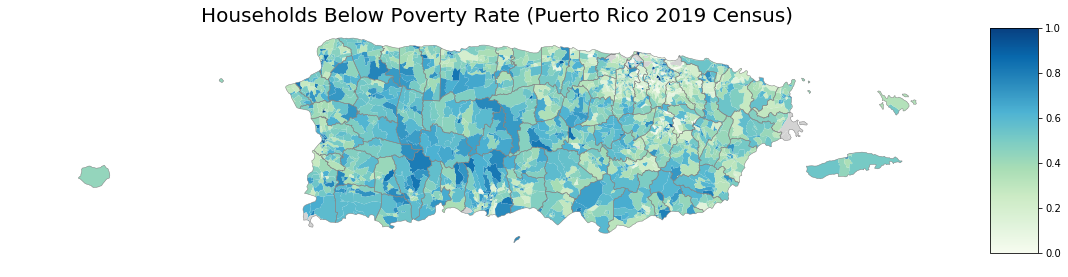

In [16]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Nice legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the demographic and superimpose the county outline
# Highlight the missing datapoints in grey
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_blocks_demo_map.plot(column='below_poverty_rate', ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)

# title and layout
ax.set_title('Households Below Poverty Rate (Puerto Rico 2019 Census)', fontsize=20)
ax.axis('off')
plt.tight_layout()

# exports as png
# plt.savefig('below_poverty.png')

### Visualize the public assistance rate

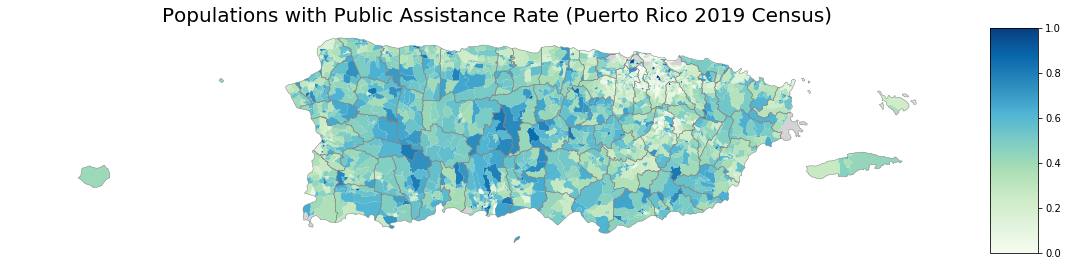

In [17]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Nice legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the demographic and superimpose the county outline
# Highlight the missing datapoints in grey
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_blocks_demo_map.plot(column='with_assistance_rate', ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)

# title and layout
ax.set_title('Populations with Public Assistance Rate (Puerto Rico 2019 Census)', fontsize=20)
ax.axis('off')
plt.tight_layout()

# exports as png
# plt.savefig('pub_assist.png')

### Visualize the high school diploma or higher rate

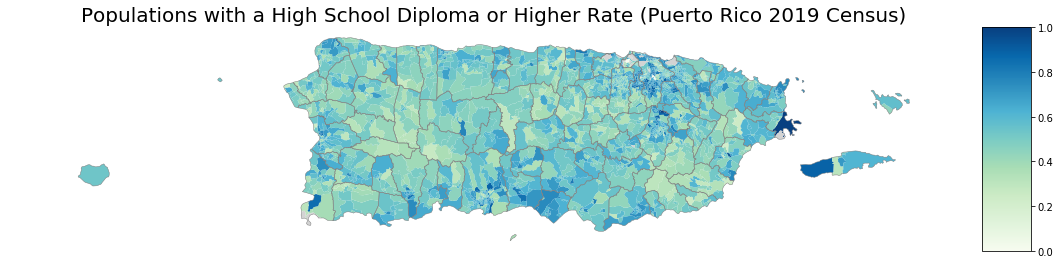

In [18]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Nice legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the demographic and superimpose the county outline
# Highlight the missing datapoints in grey
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_blocks_demo_map.plot(column='hs_diploma_or_higher_rate', ax=ax, legend=True, cax=cax, cmap='GnBu', missing_kwds={'color': 'lightgrey'})
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.5)

# title and layout
ax.set_title('Populations with a High School Diploma or Higher Rate (Puerto Rico 2019 Census)', fontsize=20)
ax.axis('off')
plt.tight_layout()

# exports as png
# plt.savefig('hs_diploma_or_more.png')

## Census Tract Demographics Map

### Load the census tract demographics

In [19]:
census_tract_demo = pd.read_csv('../data/census-tract/census-tract-demographics.csv')

In [20]:
census_tract_demo.head()

,censusid,tractid,tractname,total_population_edu,high_school_diploma,ged_credential,bachelors_degree,masters_degree,professional_degree,doctorate_degree,...,rent_20_25_percent,rent_20_25_percent_rate,rent_25_30_percent,rent_25_30_percent_rate,rent_30_35_percent,rent_30_35_percent_rate,rent_35_percent_plus,rent_35_percent_plus_rate,rent_not_computed,rent_not_computed_rate
0,1400000US72001956300,72001956300,"Census Tract 9563, Adjuntas Municipio, Puerto ...",2846,783,39,511,44,15,0,...,0,0.0,13,5.4,14,5.8,182,75.8,206,NaN
1,1400000US72001956400,72001956400,"Census Tract 9564, Adjuntas Municipio, Puerto ...",1968,428,0,361,19,0,0,...,0,0.0,45,23.1,0,0.0,89,45.6,351,NaN
2,1400000US72001956500,72001956500,"Census Tract 9565, Adjuntas Municipio, Puerto ...",1881,327,8,237,45,0,0,...,0,0.0,54,42.9,13,10.3,17,13.5,334,NaN
3,1400000US72001956600,72001956600,"Census Tract 9566, Adjuntas Municipio, Puerto ...",1458,357,26,157,33,0,47,...,25,11.6,13,6.0,26,12.1,96,44.7,236,NaN
4,1400000US72001956700,72001956700,"Census Tract 9567, Adjuntas Municipio, Puerto ...",1304,268,18,182,82,0,16,...,9,5.8,0,0.0,28,17.9,77,49.4,203,NaN


In [37]:
census_tract_demo['median_value']

0       75000
1       83300
2       70700
3      107200
4      113500
        ...  
940     99000
941    124700
942    105000
943     99800
944     78800
Name: median_value, Length: 945, dtype: object

Load the census block shapefiles for Puerto Rico
https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

In [22]:
census_tract_shp = gpd.read_file('../data/census-tract/shapefiles/cb_2017_72_tract_500k.shp')

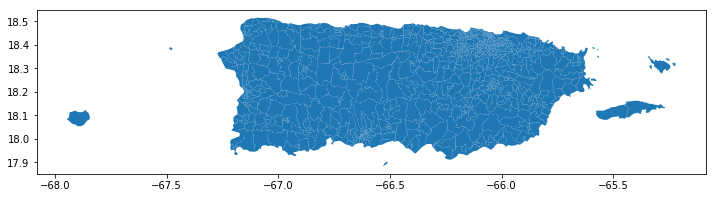

In [23]:
census_tract_shp.plot(figsize=(12,12))

In [24]:
census_tract_shp.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,72,001,956600,1400000US72001956600,72001956600,9566,CT,1981100,0,"POLYGON ((-66.73079 18.16964, -66.73027 18.169..."
1,72,005,400600,1400000US72005400600,72005400600,4006,CT,1115791,876,"POLYGON ((-67.15763 18.44185, -67.15620 18.444..."
2,72,005,401100,1400000US72005401100,72005401100,4011,CT,1014807,61520,"POLYGON ((-67.16064 18.41277, -67.15869 18.413..."
3,72,013,300301,1400000US72013300301,72013300301,3003.01,CT,5617590,46564,"POLYGON ((-66.70432 18.42882, -66.70247 18.429..."
4,72,021,030105,1400000US72021030105,72021030105,301.05,CT,1649790,6842,"POLYGON ((-66.13923 18.39673, -66.13703 18.394..."


In [25]:
# dissolve by the second column which is the county boundary, dissolve by first column is the state boundary
county_outline = census_tract_shp.dissolve(by=census_tract_shp.columns[1], aggfunc='first')

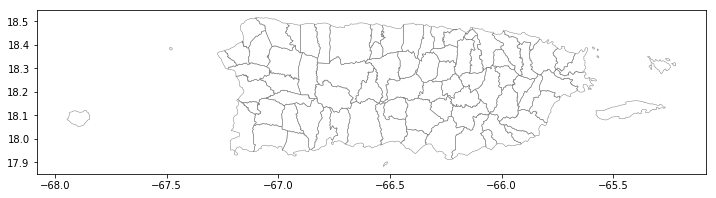

In [26]:
county_outline.plot(figsize=(12,12), facecolor='none', edgecolor='grey', linewidth=.5)

In [27]:
df_all = census_tract_demo.merge(census_tract_shp.drop_duplicates(), left_on='censusid', right_on='AFFGEOID',                    how='left', indicator=True)
df_all['_merge'].value_counts()

both          908
left_only      37
right_only      0
Name: _merge, dtype: int64

In [28]:
# Merge the 2 dataframes by census_tract_shp.AFFGEOID and census_blocks_demo.censusid
# Left join so that we only keep the blocks corresponding to the shapefile blocks
census_tract_demo_map = census_tract_shp.merge(
    census_tract_demo.loc[:, ['censusid', 'median_value']], 
    how='left', left_on='AFFGEOID', right_on='censusid', validate='one_to_one')

In [29]:
census_tract_demo_map.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,censusid,median_value
0,72,001,956600,1400000US72001956600,72001956600,9566,CT,1981100,0,"POLYGON ((-66.73079 18.16964, -66.73027 18.169...",1400000US72001956600,107200
1,72,005,400600,1400000US72005400600,72005400600,4006,CT,1115791,876,"POLYGON ((-67.15763 18.44185, -67.15620 18.444...",1400000US72005400600,124100
2,72,005,401100,1400000US72005401100,72005401100,4011,CT,1014807,61520,"POLYGON ((-67.16064 18.41277, -67.15869 18.413...",1400000US72005401100,95800
3,72,013,300301,1400000US72013300301,72013300301,3003.01,CT,5617590,46564,"POLYGON ((-66.70432 18.42882, -66.70247 18.429...",1400000US72013300301,77800
4,72,021,030105,1400000US72021030105,72021030105,301.05,CT,1649790,6842,"POLYGON ((-66.13923 18.39673, -66.13703 18.394...",1400000US72021030105,140400


In [106]:
# Convert Median_Value to int
census_tract_demo_map['median_value'] = pd.to_numeric(census_tract_demo_map.median_value, errors='coerce')

### Visualize the median house value rate

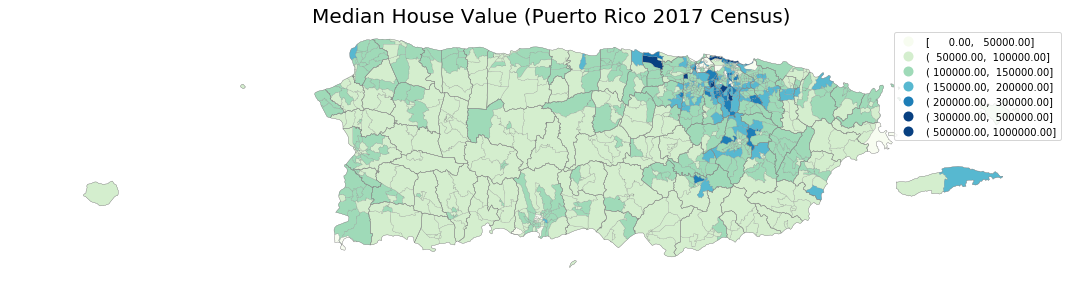

In [117]:
# https://geopandas.org/mapping.html

fig, ax = plt.subplots(figsize=(15, 10))

# Plot the demographic and superimpose the county outline
# color scheme: https://matplotlib.org/tutorials/colors/colormaps.html
census_tract_demo_map.plot(column='median_value', edgecolor='grey', linewidth=.2, ax=ax, legend=True, cmap='GnBu', scheme='user_defined', 
                           classification_kwds=dict(bins=[50000,100000,150000,200000,300000,500000,1000000]))
county_outline.plot(ax=ax, facecolor='none', edgecolor='grey', linewidth=.3)

# title and layout
ax.set_title('Median House Value (Puerto Rico 2017 Census)', fontsize=20)
ax.axis('off')
plt.tight_layout()